In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-RFA-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,Medu,studytime,failures,schoolsup,higher,Dalc,Walc,health,G3
0,1,1,4,2,0,1,1,1,1,3,6
1,1,1,1,2,0,0,1,1,1,3,6
2,1,1,1,2,0,1,1,2,3,3,6
3,1,1,4,3,0,0,1,1,1,5,7
4,1,1,3,2,0,0,1,1,2,5,7


## PCA 

In [3]:
X = np.array(df_por.drop('G3',axis = 1))

In [4]:
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X = sc.transform(X)

X

array([[ 0.73094388,  0.83337685,  1.31021563, ..., -0.54355533,
        -0.99769466, -0.3710422 ],
       [ 0.73094388,  0.83337685, -1.33603938, ..., -0.54355533,
        -0.99769466, -0.3710422 ],
       [ 0.73094388,  0.83337685, -1.33603938, ...,  0.53855329,
         0.56067799, -0.3710422 ],
       ...,
       [-1.36809408,  0.83337685, -1.33603938, ..., -0.54355533,
        -0.99769466,  1.01290255],
       [-1.36809408, -1.19993734,  0.42813063, ...,  1.62066191,
         1.33986431, -1.06301457],
       [-1.36809408, -1.19993734,  0.42813063, ...,  1.62066191,
         1.33986431,  1.01290255]])

In [6]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

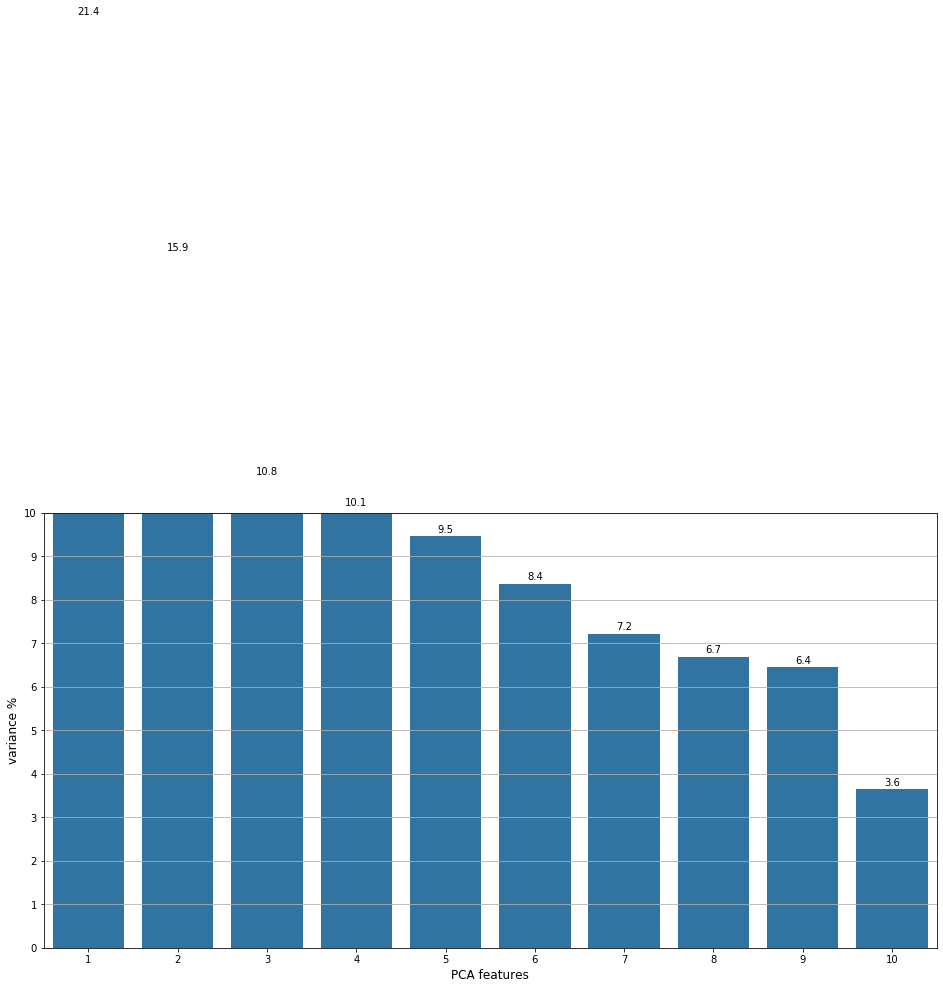

In [7]:
plt.figure(figsize = (16,8))
ax = sns.barplot(list(range(1,pca.n_components_ + 1)),pca.explained_variance_ratio_ * 100,color = '#1f77b4')
plt.yticks(np.arange(0,11,1))
plt.ylim(0,10)
ax.yaxis.grid(True)
plt.xlabel('PCA features',fontsize = 12)
plt.ylabel('variance %',fontsize = 12)

for rect,label in zip(ax.patches,np.around(pca.explained_variance_ratio_ * 100,1)):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,height + 0.05,label,ha = 'center',va = 'bottom');

## KMeans

In [8]:
df_por_pca = pd.DataFrame(pca.transform(X))
df_por_pca = df_por_pca.iloc[:,:4]

df_por_pca.shape

(649, 4)

In [9]:
clusters = range(1,10)
inertias = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(df_por_pca)
    inertias.append(model.inertia_)

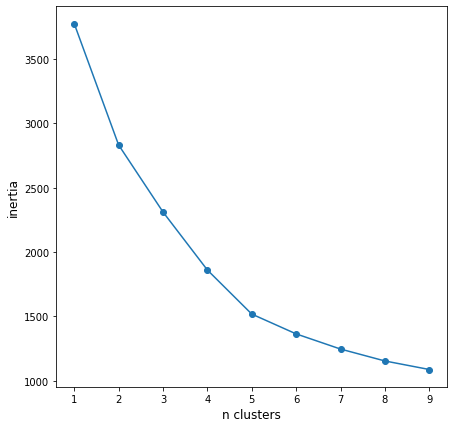

In [10]:
plt.figure(figsize = (7,7))
plt.plot(clusters,inertias,'-o')
plt.xlabel('n clusters',fontsize = 12)
plt.ylabel('inertia',fontsize = 12)
plt.xticks(clusters);

In [11]:
model = KMeans(n_clusters = 3,random_state = 42)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
y_kmeans = model.predict(X)

In [13]:
silhouette_coefficient = silhouette_score(df_por_pca,y_kmeans)

silhouette_coefficient

0.3063153443668217

In [14]:
y_kmeans = pd.DataFrame(y_kmeans)

y_kmeans.columns = ['cluster']

In [15]:
df_por_original = pd.read_pickle('df_por_range-G3-10_repaired-G3-0-values.pkl')

df_por = pd.concat([df_por_original,y_kmeans],axis = 1)

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,6,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,7,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,7,2


In [16]:
df_por_original['G3'].value_counts().sort_index()

1       4
2       4
3       6
4      50
5     133
6     176
7     145
8      85
9      44
10      2
Name: G3, dtype: int64

In [17]:
df_por['cluster'].value_counts().sort_index()

0     65
1    172
2    412
Name: cluster, dtype: int64

### Cluster '0'

In [18]:
df_por_cluster_0 = df_por[df_por['cluster'] == 0]

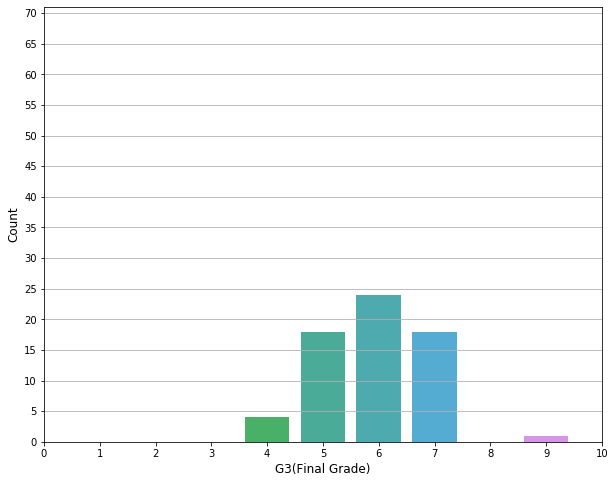

In [19]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_0['G3'],order = list(range(0,11)))
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,71,5))
plt.xlim(0,10)
plt.ylim(0,71)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12);

In [20]:
def grades_table(df):
    total = df['G3'].value_counts().sort_index()
    percentage = round(df['G3'].value_counts(normalize = True).sort_values(ascending = False),2) * 100
    df_grades = pd.concat([total,percentage],axis = 1,keys = ['total','percentage'])
    missing_grades = list(set(range(0,11)) - set(total.index))
    for grade in missing_grades:
        df_missing_grade = pd.DataFrame([[0,0]],columns = ['total','percentage'],index = [grade])
        df_grades = df_grades.append(df_missing_grade).sort_index()
    return df_grades

In [21]:
grades_table(df_por_cluster_0)

,total,percentage
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,4,6.0
5,18,28.0
6,24,37.0
7,18,28.0
8,0,0.0
9,1,2.0


### Cluster '1'

In [22]:
df_por_cluster_1 = df_por[df_por['cluster'] == 1]

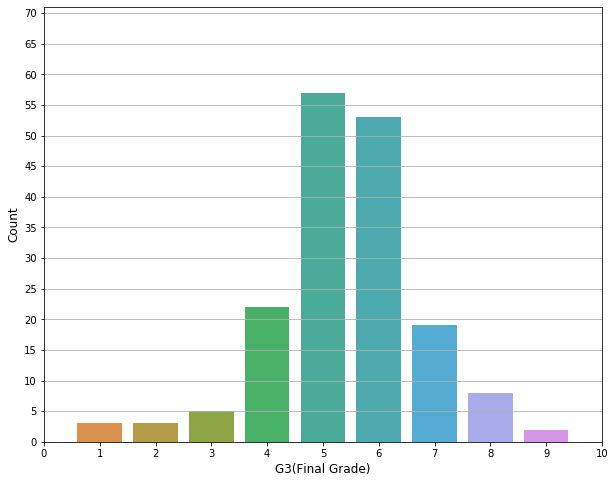

In [23]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_1['G3'],order = list(range(0,11)))
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,71,5))
plt.xlim(0,10)
plt.ylim(0,71)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12);

In [24]:
grades_table(df_por_cluster_1)

,total,percentage
0,0,0.0
1,3,2.0
2,3,2.0
3,5,3.0
4,22,13.0
5,57,33.0
6,53,31.0
7,19,11.0
8,8,5.0
9,2,1.0


### Cluster '2'

In [25]:
df_por_cluster_2 = df_por[df_por['cluster'] == 2]

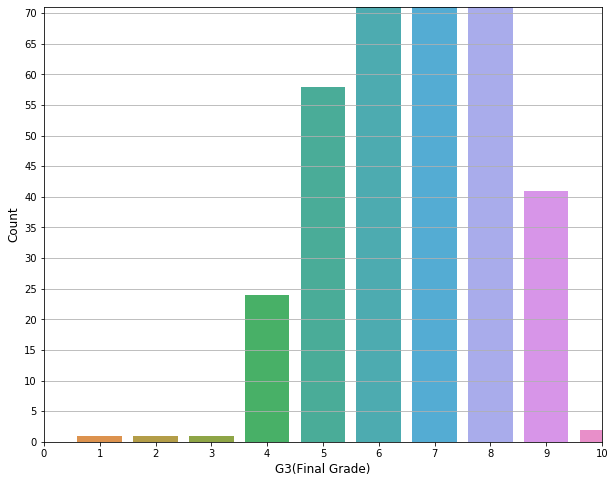

In [26]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_2['G3'],order = list(range(0,11)))
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,71,5))
plt.xlim(0,10)
plt.ylim(0,71)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12);

In [27]:
grades_table(df_por_cluster_2)

,total,percentage
0,0,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,24,6.0
5,58,14.0
6,99,24.0
7,108,26.0
8,77,19.0
9,41,10.0


### Cluster Distributions

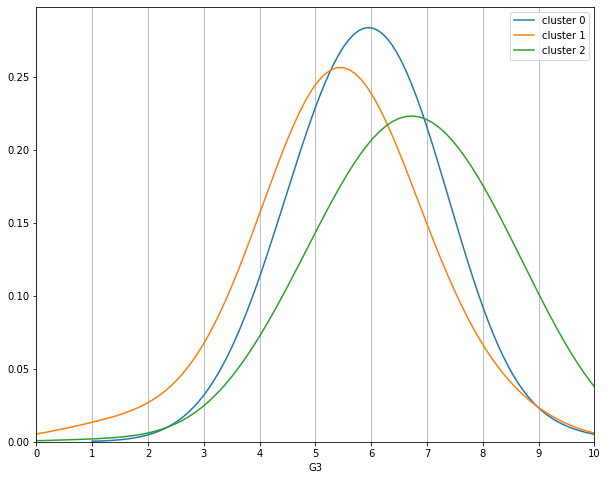

In [28]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
sns.distplot(df_por_cluster_0['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,10),label = 'cluster 0')
sns.distplot(df_por_cluster_1['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,10),label = 'cluster 1')
sns.distplot(df_por_cluster_2['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,10),label = 'cluster 2')
plt.xticks(np.arange(0,11))
plt.xlim(0,10)
ax.xaxis.grid(True)
plt.legend();

In [29]:
pd.to_pickle(df_por_cluster_0,'df_por_cluster_0.pkl')
pd.to_pickle(df_por_cluster_1,'df_por_cluster_1.pkl')
pd.to_pickle(df_por_cluster_2,'df_por_cluster_2.pkl')